# **Análise de dados sobre os hábitos de escuta dos usuários do spotify**
### **Aluno:** Igor Klippel Campos
### **MVP (Produto Mínimo Viável) do Sprint:** Engenharia de Dados (40530010057_20250_01)

#Introdução

O Spotify é uma das principais plataformas de streaming de áudio do mundo, oferecendo acesso a um vasto catálogo de músicas e podcasts. Lançado em 2006, o serviço está presente em mais de 180 países e territórios, com um acervo superior a 100 milhões de faixas. Em julho de 2023, a plataforma contabilizava mais de 527 milhões de usuários ativos globalmente.

###*Sobre o Dataset:*

O conjunto de dados utilizado neste MVP foi obtido no Kaggle em 28 de março de 2025. Ele contém informações diárias sobre as 50 músicas mais tocadas em 73 países, abrangendo o período de 17 de outubro de 2023 até 28 de março de 2025.(dia do download).

**Link do dataset:**: https://www.kaggle.com/datasets/asaniczka/top-spotify-songs-in-73-countries-daily-updated

###*Objetivos Principais:*

Explorar e analisar os dados para entender as principais tendências musicais no Spotify, utilizando atributos técnicos das faixas. Especificamente, quero saber se músicas com conteúdo explícito são mais populares do que aquelas sem conteúdo explícito ou censuradas.

###*Sobre a Carga do Dataset:*

O dataset foi baixado no formato CSV e carregado no ambiente Databricks via DBFS (Databricks File System), sendo posteriormente processado com Apache Spark.

###*Qualidade de dados:*

- Total de 1.869.020 registros distribuídos em 25 colunas.
- Presença de valores nulos em algumas colunas.
- Algumas faixas possuem duração de 0 segundos, o que exige atenção no tratamento de dados.

###*Desafios Técnicos:*

- Utilização do Databricks Community Edition, com recursos de cluster limitados.
- Processamento dos dados utilizando Apache Spark ao invés de SQL ou Pandas.
- Estruturação do projeto seguindo o modelo de camadas em medalhão (bronze, silver, gold).

###*Autoavaliação:*

- Trabalhar em um ambiente em nuvem como o Databricks foi uma experiência enriquecedora. Apesar da limitação da versão gratuita como a necessidade de reinicializar o cluster a cada sessão, foi possível conduzir o projeto de forma eficiente.
- Utilizar Spark apresentou um grau maior de complexidade em comparação a ferramentas mais familiares pra mim como Pandas e SQL, mas proporcionou aprendizado sobre processamento distribuído e escalabilidade.
- A aplicação do modelo de medalhão foi essencial para estruturar as etapas da pipeline de forma clara e organizada.
- A ausência de uma coluna com o gênero musical foi uma limitação para certas análises qualitativas infelizmente, não foi possível inferir com precisão os gêneros apenas com os atributos disponíveis.
- Consegui alcançar o objetivo original do projeto. Para trabalhos futuros, pretendo aplicar algoritmos de aprendizado de máquina com o intuito de identificar padrões que contribuam para a popularidade de músicas em diferentes países.

## Catálogo de Dados

| Coluna               | Tipo     | Descrição                                      | Valores Válidos                          | Observações                                  |
|----------------------|----------|-----------------------------------------------|------------------------------------------|---------------------------------------------|
| **spotify_id**       | string   | Identificador único da música no Spotify      | Formato alfanumérico (ex: "3LPLRNr58Z9Pn0clnEtkXb") | Chave primária                             |
| **name**             | string   | Nome da música                                | Texto livre                              | -                                           |
| **artists**          | string   | Artistas participantes                        | Texto com múltiplos artistas separados por vírgula | Pode conter "Various Artists"             |
| **daily_rank**       | int      | Posição no ranking diário                     | 1 a 50                                   | 1 = mais tocada                            |
| **daily_movement**   | int      | Variação diária na posição                    | -49 a +49                                | Positivo = subiu no ranking                |
| **weekly_movement**  | int      | Variação semanal na posição                   | -49 a +49                                | Comparação com 7 dias atrás                |
| **country**          | string   | País de origem do ranking                     | Código ISO 2 letras (ex: "BR") ou "GLOBAL" | 1.37% nulos (tratados como "GLOBAL")      |
| **snapshot_date**    | string   | Data da coleta                                | Formato "yyyy-mm-dd"                     | -                                           |
| **popularity**       | int      | Score de popularidade                         | 0 a 100                                  | 100 = mais popular                         |
| **is_explicit**      | boolean  | Conteúdo explícito                            | true/false                               | -                                           |
| **duration_ms**      | int      | Duração em milissegundos                      | > 30.000 (30 segundos)                   | Convertido para minutos na silver          |
| **album_name**       | string   | Nome do álbum                                 | Texto livre                              | 0.04% nulos (substituídos por "[Unknown Album]") |
| **album_release_date** | string | Data de lançamento do álbum                   | Formato "yyyy-mm-dd"                     | 0.03% nulos (substituídos pela snapshot_date) |
| **danceability**     | double   | Score de dançabilidade                        | 0.0 a 1.0                                | Baseado em algoritmos do Spotify           |
| **energy**           | double   | Intensidade e atividade                       | 0.0 a 1.0                                | Baseado em algoritmos do Spotify                                           |
| **key**              | int      | Tom musical                                   | 0 a 11                                   | 0 = C, 1 = C#, etc.                        |
| **loudness**         | double   | Volume médio em dB                            | -60.0 a 0.0                              | Valores negativos são normais              |
| **mode**             | int      | Modalidade musical                            | 0 (menor) ou 1 (maior)                   | -                                           |
| **speechiness**      | double   | Presença de voz falada                        | 0.0 a 1.0                                | >0.66 = provavelmente podcast              |
| **acousticness**     | double   | Confiança de ser acústico                     | 0.0 a 1.0                                | -                                           |
| **instrumentalness** | double   | Predominância instrumental                    | 0.0 a 1.0                                | >0.5 = provavelmente sem vocais            |
| **liveness**         | double   | Probabilidade de gravação ao vivo             | 0.0 a 1.0                                | -                                           |
| **valence**          | double   | Positividade emocional                        | 0.0 a 1.0                                | 0 = triste, 1 = feliz                      |
| **tempo**            | double   | BPM (batidas por minuto)                      | > 0                                      | -                                           |
| **time_signature**   | int      | Compasso musical                              | 1 a 7                                    | 4 = 4/4 (mais comum)                       |

In [0]:
# Começo do código com a importação de bibliotecas e inicialização do Spark.

# Bibliotecas essenciais
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when, split, round, to_date, count, sum as spark_sum
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.window import Window
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de visualização
plt.style.use('ggplot')
sns.set_palette("husl")

# Inicializar Spark
spark = (SparkSession.builder
         .appName("Spotify_MVP")
         .config("spark.sql.legacy.timeParserPolicy", "LEGACY")

         .getOrCreate())

In [0]:
# Importação do dataset e criação da tabela bronze.

BRONZE_PATH = "dbfs:/mnt/spotify/bronze"
dbutils.fs.mkdirs(BRONZE_PATH)

try:
    bronze_df = (spark.read
                .option("header", "true")
                .option("inferSchema", "true")
                .option("escape", "\"")
                .csv("dbfs:/FileStore/tables/universal_top_spotify_songs.csv"))
    
    bronze_df.write.mode("overwrite").format("delta").save("dbfs:/mnt/spotify/bronze/universal_top_songs")
    print("Camada bronze salva com sucesso!")
    
    
except Exception as e:
    print(f"Erro na camada bronze: {str(e)}")
    raise

Camada bronze salva com sucesso!


Agora vamos fazer uma análise dos dados que temos no dataset.

In [0]:
# Contagem total de registros
total_records = bronze_df.count()
print(f"Total de registros: {total_records}")

# Estatísticas descritivas para colunas numéricas
numeric_cols = [col_name for col_name, dtype in bronze_df.dtypes if dtype in ("int", "double", "float")]
print("\nEstatísticas descritivas (colunas numéricas):")
bronze_df.select(numeric_cols).describe().show()

# Valores únicos para colunas categóricas
categorical_cols = [col_name for col_name, dtype in bronze_df.dtypes if dtype == "string"]
print("\nValores únicos (colunas categóricas):")
for col_name in categorical_cols:
    print(f"\nColuna: {col_name}")
    bronze_df.select(col_name).distinct().show(5, truncate=False)  # Mostra 5 valores únicos

Total de registros: 1869020

Estatísticas descritivas (colunas numéricas):
+-------+------------------+------------------+------------------+------------------+------------------+-------------------+-------------------+------------------+------------------+-------------------+-------------------+------------------+--------------------+-------------------+-------------------+------------------+------------------+
|summary|        daily_rank|    daily_movement|   weekly_movement|        popularity|       duration_ms|       danceability|             energy|               key|          loudness|               mode|        speechiness|      acousticness|    instrumentalness|           liveness|            valence|             tempo|    time_signature|
+-------+------------------+------------------+------------------+------------------+------------------+-------------------+-------------------+------------------+------------------+-------------------+-------------------+------------------+--

In [0]:
# Verifica linhas duplicadas
duplicates = bronze_df.groupBy(bronze_df.columns).count().filter("count > 1")
print(f"\nLinhas duplicadas: {duplicates.count()}")
if duplicates.count() > 0:
    display(duplicates.limit(5))


Linhas duplicadas: 0


In [0]:
# Cria um resumo em Pandas para visualização
summary_data = []
for col_name in bronze_df.columns:
    dtype = dict(bronze_df.dtypes)[col_name]
    null_count = bronze_df.filter(col(col_name).isNull()).count()
    unique_count = bronze_df.select(col_name).distinct().count()
    
    summary_data.append({
        "Coluna": col_name,
        "Tipo": dtype,
        "Nulos": null_count,
        "% Nulos": f"{(null_count / total_records) * 100:.2f}%",
        "Valores Únicos": unique_count
    })

# Exibe como tabela formatada
summary_df = pd.DataFrame(summary_data)
display(summary_df)

Coluna,Tipo,Nulos,% Nulos,Valores Únicos
spotify_id,string,0,0.00%,21923
name,string,30,0.00%,19230
artists,string,29,0.00%,12307
daily_rank,int,0,0.00%,50
daily_movement,int,0,0.00%,99
weekly_movement,int,0,0.00%,99
country,string,25557,1.37%,73
snapshot_date,string,0,0.00%,516
popularity,int,0,0.00%,101
is_explicit,boolean,0,0.00%,2


Temos 1.869.020 registros não temos nenhuma entrada duplicada, porém, temos alguns dados nulos, principalmente em Country(País), assim como alguns dados estão 0 sendo que não deveria ser possível, como no tempo de duração da música.

Vou fazer uma análise dos dados nulos em país para ver se descobrimos o porque de ter 25.557 nulos quando a segunda coluna com a maior quantidade de nulos tem apenas 822.

In [0]:
# Verificar distribuição de nulos por data
display(
  bronze_df.filter(col("country").isNull())
    .groupBy("snapshot_date")
    .count()
    .orderBy(col("count").desc())
)

# Verificar artistas/álbuns associados a nulos
bronze_df.filter(col("country").isNull()) \
  .select("artists", "album_name") \
  .distinct() \
  .show(10, truncate=False)

snapshot_date,count
2023-11-20,54
2024-03-16,53
2023-10-27,52
2024-03-18,51
2025-02-25,50
2025-03-20,50
2025-01-23,50
2025-01-28,50
2025-01-25,50
2025-03-26,50


+---------------------+-------------------------------------+
|artists              |album_name                           |
+---------------------+-------------------------------------+
|Gracie Abrams        |The Secret of Us (Deluxe)            |
|Doechii              |Alligator Bites Never Heal (Extended)|
|Lady Gaga, Bruno Mars|MAYHEM                               |
|Kendrick Lamar, SZA  |GNX                                  |
|Bad Bunny            |DeBÍ TiRAR MáS FOToS                 |
|Gigi Perez           |Sailor Song                          |
|Kendrick Lamar       |Not Like Us                          |
|Alex Warren          |You'll Be Alright, Kid (Chapter 1)   |
|JENNIE               |Ruby                                 |
|Billie Eilish        |HIT ME HARD AND SOFT                 |
+---------------------+-------------------------------------+
only showing top 10 rows



Temos algumas variações que podem ser justificadas com falhas na API, porém, o dados é quase que inteiro de 50 entradas nulas por dia, isso vai de encontro com a hipótese dessas entradas nulas serem o top 50 global, vamos ajustar os nulos de países e das outros colunas para a tabela silver.

In [0]:
# Configuração inicial
SILVER_PATH = "dbfs:/mnt/spotify/silver"
dbutils.fs.mkdirs(SILVER_PATH)

# Transformações principais
silver_df = (
    bronze_df
    # Tratamento de valores nulos
    .withColumn("country", 
                when(col("country").isNull(), "GLOBAL")
                .otherwise(col("country")))
    
    # Remove linhas com nulos em QUALQUER coluna + condições adicionais
.na.drop()
.filter(
    (col("duration_ms") > 0) &
    (col("time_signature") > 0)
)
    
    # Transformações de dados
    .withColumn("artists_array", split(col("artists"), ",\\s*"))
    .withColumn("duration_min", round(col("duration_ms")/60000, 2))
    .withColumn("snapshot_date", to_date(col("snapshot_date"), "yyyy-MM-dd"))
    .withColumn("is_global", when(col("country") == "GLOBAL", 1).otherwise(0))
    .drop("duration_ms")
)

# Controle de qualidade completo
def run_quality_checks(df):
    
    # Verificação de nulos
    print("\n=== Nulos por coluna ===")
    null_check = df.select([
        spark_sum(col(c).isNull().cast("int")).alias(f"{c}_nulls")
        for c in df.columns
    ])
    display(null_check)
    
    # Verificação de valores inválidos
    print("\n=== Valores fora do domínio esperado ===")
    domain_check = df.select(
        count(when(~col("daily_rank").between(1, 50), True)).alias("invalid_ranks"),
        count(when(~col("popularity").between(0, 100), True)).alias("invalid_popularity"),
        count(when(col("duration_min") <= 0, True)).alias("invalid_duration")
    )
    display(domain_check)
    
    # Análise de distribuição
    print("\n=== Distribuição de registros globais ===")
    global_stats = df.groupBy("is_global").count()
    display(global_stats)

# Execução das validações
print("Executando verificações de qualidade...")
run_quality_checks(silver_df)

# Persistência dos dados
(
    silver_df.write
    .mode("overwrite")
    .format("delta")
    .option("overwriteSchema", "true")
    .partitionBy("country", "is_global")
    .save(f"{SILVER_PATH}/processed_songs")
)

print("\nProcesso concluído com sucesso!")
print(f"Total de registros processados: {silver_df.count()}")

Executando verificações de qualidade...

=== Nulos por coluna ===


spotify_id_nulls,name_nulls,artists_nulls,daily_rank_nulls,daily_movement_nulls,weekly_movement_nulls,country_nulls,snapshot_date_nulls,popularity_nulls,is_explicit_nulls,album_name_nulls,album_release_date_nulls,danceability_nulls,energy_nulls,key_nulls,loudness_nulls,mode_nulls,speechiness_nulls,acousticness_nulls,instrumentalness_nulls,liveness_nulls,valence_nulls,tempo_nulls,time_signature_nulls,artists_array_nulls,duration_min_nulls,is_global_nulls
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0



=== Valores fora do domínio esperado ===


invalid_ranks,invalid_popularity,invalid_duration
0,0,0



=== Distribuição de registros globais ===


is_global,count
1,25550
0,1842647



Processo concluído com sucesso!
Total de registros processados: 1868197


In [0]:
# CAMADA GOLD VAMOS FAZER O ESQUEMA ESTRELA

GOLD_PATH = "dbfs:/mnt/spotify/gold"
dbutils.fs.mkdirs(GOLD_PATH)

# ALIAS DO DATAFRAME SILVER
silver = silver_df.alias("silver")

# DIMENSÕES PRINCIPAIS

# Dim_Artist
dim_artist = (silver
    .select(
        col("artists").alias("artist_name"),
        col("artists_array"),
        col("is_explicit")
    )
    .distinct()
    .withColumn("artist_id", monotonically_increasing_id())
    .alias("dim_artist"))

# Dim_Track
dim_track = (silver
    .select(
        col("spotify_id"),
        col("name").alias("track_name"),
        col("duration_min"),
        col("danceability"),
        col("energy"),
        col("key"),
        col("loudness"),
        col("mode"),
        col("speechiness"),
        col("acousticness"),
        col("instrumentalness"),
        col("liveness"),
        col("valence"),
        col("tempo"),
        col("time_signature")
    )
    .distinct()
    .alias("dim_track"))

# Dim_Album
dim_album = (silver
    .select(
        col("album_name"),
        col("album_release_date")
    )
    .distinct()
    .withColumn("album_id", monotonically_increasing_id())
    .alias("dim_album"))

# Dim_Date
dim_date = (silver
    .select(
        col("snapshot_date").alias("date"),
        year("snapshot_date").alias("year"),
        month("snapshot_date").alias("month"),
        dayofweek("snapshot_date").alias("day_of_week")
    )
    .distinct()
    .alias("dim_date"))

# Dim_Location
dim_location = (silver
    .select(
        col("country"),
        col("is_global")
    )
    .distinct()
    .alias("dim_location"))

# TABELA DE FATOS
fact_streams = (silver
    .join(dim_artist, col("silver.artists") == col("dim_artist.artist_name"))
    .join(dim_track, col("silver.spotify_id") == col("dim_track.spotify_id"))
    .join(dim_album, (col("silver.album_name") == col("dim_album.album_name")) &
                     (col("silver.album_release_date") == col("dim_album.album_release_date")))
    .select(
        col("dim_artist.artist_id"),
        col("dim_track.spotify_id"),
        col("dim_album.album_id"),
        col("silver.snapshot_date").alias("date"),
        col("silver.country"),
        col("silver.daily_rank"),
        col("silver.daily_movement"),
        col("silver.weekly_movement"),
        col("silver.popularity"),
        lit(1).alias("stream_count")
    ))

# PERSISTÊNCIA DAS TABELAS GOLD
dim_artist.write.mode("overwrite").format("delta").save(f"{GOLD_PATH}/dim_artist")
dim_track.write.mode("overwrite").format("delta").save(f"{GOLD_PATH}/dim_track") 
dim_album.write.mode("overwrite").format("delta").save(f"{GOLD_PATH}/dim_album")
dim_date.write.mode("overwrite").format("delta").save(f"{GOLD_PATH}/dim_date")
dim_location.write.mode("overwrite").format("delta").save(f"{GOLD_PATH}/dim_location")

(fact_streams.write
    .mode("overwrite")
    .format("delta")
    .partitionBy("date")
    .save(f"{GOLD_PATH}/fact_streams"))

# REGISTRAR NO CATALOG
spark.sql("CREATE DATABASE IF NOT EXISTS spotify_gold")

tables = {
    "dim_artist": dim_artist,
    "dim_track": dim_track,
    "dim_album": dim_album,
    "dim_date": dim_date,
    "dim_location": dim_location,
    "fact_streams": fact_streams
}

for name, df in tables.items():
    df.write.mode("overwrite").saveAsTable(f"spotify_gold.{name}")

print("Camada Gold criada com sucesso!")
print(f"Total de artistas únicos: {dim_artist.count()}")
print(f"Total de streams registrados: {fact_streams.count()}")

Camada Gold criada com sucesso!
Total de artistas únicos: 12882
Total de streams registrados: 2600127


Finalizamos agora o tratamento dos dados. Vamos prosseguir com as análises, eu escolhi alguns países de interesse para nossas consultas:

In [0]:
# Função para gerar o ranking dos 10 tracks mais populares por país
def top_musicas_por_pais(pais_nome):
 
    df = spark.table("spotify_gold.fact_streams")
    
    if pais_nome != "GLOBAL":
        df = df.filter(col("country") == pais_nome)

    return (
        df.join(spark.table("spotify_gold.dim_track"), "spotify_id")
        .groupBy("track_name")
        .agg(avg("popularity").alias("avg_popularity"))
        .orderBy(col("avg_popularity").desc())
        .limit(10)
    )

# Lista de países com nomes legíveis
paises = {
    "GLOBAL": "GLOBAL",
    "BR": "BRASIL",
    "US": "ESTADOS UNIDOS",
    "IN": "ÍNDIA",
    "FR": "FRANÇA",
    "KR": "COREIA DO SUL",
    "ZA": "ÁFRICA DO SUL"
}

# Gera e exibe os rankings
for codigo, nome_exibicao in paises.items():
    print(f"\n=== TOP 10 MÚSICAS - {nome_exibicao} ===")
    ranking = top_musicas_por_pais(codigo)
    ranking.show(truncate=False)



=== TOP 10 MÚSICAS - GLOBAL ===
+---------------------+-----------------+
|track_name           |avg_popularity   |
+---------------------+-----------------+
|greedy               |98.03352332824069|
|BIRDS OF A FEATHER   |96.93095455503266|
|Espresso             |96.07808958898744|
|Cruel Summer         |96.05518323114217|
|My Love Mine All Mine|95.96528555431131|
|Die With A Smile     |95.95317875841437|
|Si No Estás          |95.81444358776665|
|Lovin On Me          |95.40124902419984|
|DtMF                 |95.20608475190149|
|Strangers            |94.78278173439463|
+---------------------+-----------------+


=== TOP 10 MÚSICAS - BRASIL ===
+-------------------------------+-----------------+
|track_name                     |avg_popularity   |
+-------------------------------+-----------------+
|greedy                         |99.41666666666667|
|i like the way you kiss me     |99.125           |
|All I Want for Christmas Is You|98.5             |
|Cruel Summer                   |

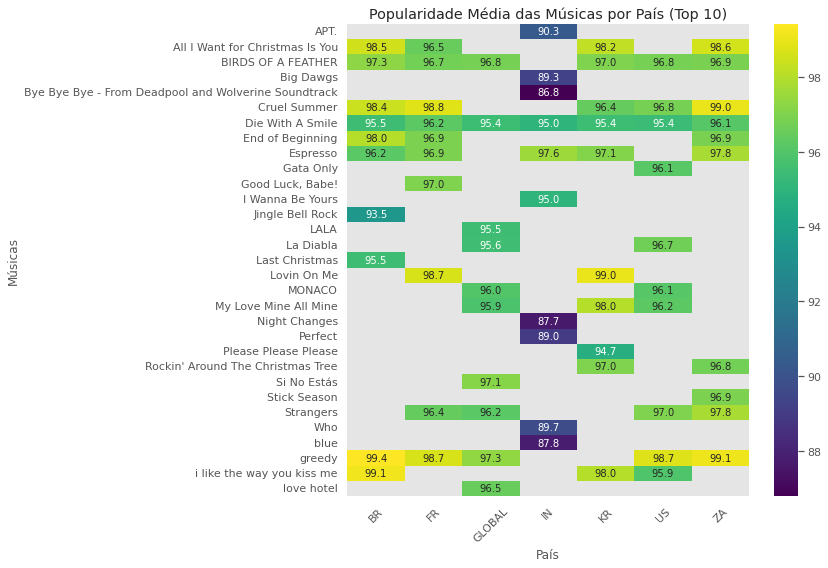

In [0]:
df_global = top_global_tracks.toPandas().assign(country='GLOBAL')
df_br = top_br_tracks.toPandas().assign(country='BR')
df_us = top_us_tracks.toPandas().assign(country='US')
df_in = top_in_tracks.toPandas().assign(country='IN')
df_fr = top_fr_tracks.toPandas().assign(country='FR')
df_kr = top_kr_tracks.toPandas().assign(country='KR')
df_za = top_za_tracks.toPandas().assign(country='ZA')

# Unificar todos
df_all = pd.concat([df_global, df_br, df_us, df_in, df_fr, df_kr, df_za])

# Pivot para heatmap
heatmap_df = df_all.pivot_table(index='track_name', columns='country', values='avg_popularity')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_df, annot=True, cmap="viridis", fmt=".1f")
plt.title("Popularidade Média das Músicas por País (Top 10)")
plt.ylabel("Músicas")
plt.xlabel("País")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [0]:
# Função para gerar o ranking dos 10 álbuns mais populares por país
def top_albuns_por_pais(pais_nome):
    return (
        spark.table("spotify_gold.fact_streams")
        .filter(col("country") == pais_nome)
        .join(spark.table("spotify_gold.dim_track"), "spotify_id")
        .join(spark.table("spotify_gold.dim_album"), "album_id")
        .join(spark.table("spotify_gold.dim_artist"), "artist_id")
        .groupBy("album_name", "artist_name")
        .agg(avg("popularity").alias("avg_popularity"))
        .orderBy(col("avg_popularity").desc())
        .limit(10)
    )

# Lista de países com nomes legíveis
paises = {
    "GLOBAL": "GLOBAL",
    "BR": "BRASIL",
    "US": "EUA",
    "IN": "ÍNDIA",
    "FR": "FRANÇA",
    "KR": "COREIA DO SUL",
    "ZA": "ÁFRICA DO SUL"
}

# Gera e exibe os rankings
for codigo, nome_exibicao in paises.items():
    print(f"\n=== TOP 10 ÁLBUNS - {nome_exibicao} ===")
    ranking = top_albuns_por_pais(codigo)
    ranking.show(truncate=False)


=== TOP 10 ÁLBUNS - GLOBAL ===
+--------------------------------------+---------------------+-----------------+
|album_name                            |artist_name          |avg_popularity   |
+--------------------------------------+---------------------+-----------------+
|Die With A Smile                      |Lady Gaga, Bruno Mars|97.79274611398964|
|Seven (feat. Latto)                   |Jung Kook, Latto     |97.44444444444444|
|greedy                                |Tate McRae           |97.3125          |
|Si No Estás                           |iñigo quintero       |97.12962962962963|
|Espresso                              |Sabrina Carpenter    |96.59333333333333|
|love hotel                            |leftovermax          |96.5             |
|Strangers                             |Kenya Grace          |96.18543046357615|
|The Land Is Inhospitable and So Are We|Mitski               |95.86147186147186|
|Beautiful Things                      |Benson Boone         |95.689189189189

Mesmo em países diferentes ao redor do mundo, as músicas e os álbuns mais ouvidas em cada país são semelhantes às do ranking global.

In [0]:
# Função para gerar o ranking dos 10 artistas mais ouvidos por país
def top_artistas_por_pais(pais_nome):

    df = spark.table("spotify_gold.fact_streams")
    
    if pais_nome != "GLOBAL":
        df = df.filter(col("country") == pais_nome)
    
    return (
        df.join(spark.table("spotify_gold.dim_artist"), "artist_id")
        .groupBy("artist_name")
        .agg(sum("stream_count").alias("total_streams"))
        .orderBy(col("total_streams").desc())
        .limit(10)
    )

# Lista de países com nomes legíveis
paises = {
    "GLOBAL": "GLOBAL",
    "BR": "BRASIL",
    "US": "EUA",
    "IN": "ÍNDIA",
    "FR": "FRANÇA",
    "KR": "COREIA DO SUL",
    "ZA": "ÁFRICA DO SUL"
}

# Gera e exibe os rankings
for codigo, nome_exibicao in paises.items():
    print(f"\n=== TOP 10 ARTISTAS - {nome_exibicao} ===")
    ranking = top_artistas_por_pais(codigo)
    ranking.show(truncate=False)



=== TOP 10 ARTISTAS - GLOBAL ===
+-----------------+-------------+
|artist_name      |total_streams|
+-----------------+-------------+
|Sabrina Carpenter|72728        |
|KAROL G          |50846        |
|Taylor Swift     |49222        |
|Bad Bunny        |48636        |
|Tate McRae       |40906        |
|Ariana Grande    |36582        |
|Jimin            |32718        |
|Chappell Roan    |31778        |
|Billie Eilish    |30809        |
|Feid             |25322        |
+-----------------+-------------+


=== TOP 10 ARTISTAS - BRASIL ===
+------------------------------------------------------------------+-------------+
|artist_name                                                       |total_streams|
+------------------------------------------------------------------+-------------+
|Henrique & Juliano                                                |1024         |
|Léo Foguete                                                       |756          |
|Simone Mendes                          

Já os artistas mais populares de cada país são mais variados.

In [0]:
# Tabela de músicas
track_df = spark.table("spotify_gold.dim_track")

# Top 10 músicas mais longas
top_longest = (track_df
    .select("track_name", "duration_min")
    .orderBy(col("duration_min").desc())
    .limit(10))

print("Top 10 Músicas com Maior Duração:")
top_longest.show(truncate=False)

# Top 10 músicas mais curtas
top_shortest = (track_df
    .select("track_name", "duration_min")
    .orderBy(col("duration_min").asc())
    .limit(10))

print("Top 10 Músicas com Menor Duração:")
top_shortest.show(truncate=False)


Top 10 Músicas com Maior Duração:
+------------------------------------------------------------------------------------------------------------------+------------+
|track_name                                                                                                        |duration_min|
+------------------------------------------------------------------------------------------------------------------+------------+
|Flamazo Navideño:                                                                                                 |15.66       |
|מחרוזת פורים שמח                                                                                                  |15.56       |
|Kabza Chant (feat. Young Stunna, Nkosazana Daughter, Mthunzi, Nokwazi, Anzo, Mashudu, Murumba Pitch & Tman Xpress)|15.53       |
|iLanga (feat. MaWhoo, Kagiso & Maremo Violin)                                                                     |13.89       |
|Jesús                                                  

O dataset contém músicas com durações que variam de 16 segundos a quase 16 minutos.

Correlação com a Popularidade:
loudness            0.123652
valence             0.076648
duration_min        0.069200
acousticness        0.050478
energy              0.039421
mode                0.029420
key                 0.020018
liveness            0.013928
tempo              -0.009074
danceability       -0.019646
time_signature     -0.020976
instrumentalness   -0.080604
speechiness        -0.109614
Name: popularity, dtype: float64


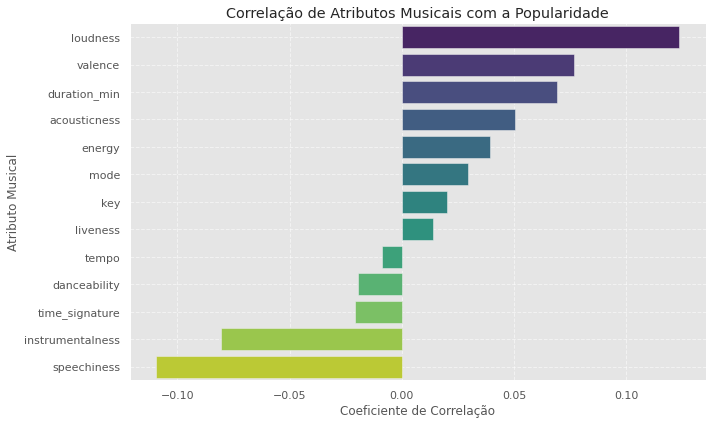

In [0]:
# Junta track com popularidade média por música
track_popularity = (
    spark.table("spotify_gold.fact_streams")
    .join(spark.table("spotify_gold.dim_track"), "spotify_id")
    .groupBy("spotify_id", "track_name", "duration_min", "danceability", "energy", "key",
             "loudness", "mode", "speechiness", "acousticness", "instrumentalness",
             "liveness", "valence", "tempo", "time_signature")
    .agg(avg("popularity").alias("popularity"))
)

# Seleciona colunas de interesse
features = [
    "duration_min", "danceability", "energy", "key", "loudness", "mode",
    "speechiness", "acousticness", "instrumentalness", "liveness",
    "valence", "tempo", "time_signature", "popularity"
]

# Coleta os dados para pandas
track_pd = track_popularity.select(features).toPandas()

# Garante que todas as colunas sejam numéricas (evita erro)
track_pd = track_pd.apply(pd.to_numeric, errors='coerce')

# Calcula correlação com a popularidade
correlations = track_pd.corr()["popularity"].drop("popularity").sort_values(ascending=False)

# Mostra em formato de tabela
print("Correlação com a Popularidade:")
print(correlations)

# Plot em gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.values, y=correlations.index, palette="viridis")
plt.title("Correlação de Atributos Musicais com a Popularidade")
plt.xlabel("Coeficiente de Correlação")
plt.ylabel("Atributo Musical")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


A análise de correlação revelou que atributos classificados pelo Spotify, como loudness, valence e duration, tendem a apresentar uma relação mais forte com a popularidade das músicas, enquanto características como instrumentalness e speechiness demonstram correlação negativa.

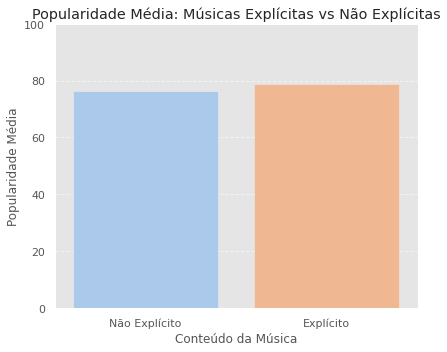

In [0]:
# Junta fact_streams com dim_artist pela chave artist_id
explicit_popularity = (
    spark.table("spotify_gold.fact_streams")
    .join(spark.table("spotify_gold.dim_artist"), "artist_id")
    .groupBy("is_explicit")
    .agg(avg("popularity").alias("avg_popularity"))
    .orderBy("is_explicit")
)

# Converte para Pandas
explicit_pd = explicit_popularity.toPandas()
explicit_pd["is_explicit"] = explicit_pd["is_explicit"].map({True: "Explícito", False: "Não Explícito"})

# Gráfico
plt.figure(figsize=(6, 5))
sns.barplot(data=explicit_pd, x="is_explicit", y="avg_popularity", palette="pastel")
plt.title("Popularidade Média: Músicas Explícitas vs Não Explícitas")
plt.xlabel("Conteúdo da Música")
plt.ylabel("Popularidade Média")
plt.ylim(0, 100)
plt.grid(True, axis='y', linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


Por fim, o fato de uma música conter ou não conteúdo explícito não parece ser um fator determinante para sua popularidade, indicando que esse atributo tem pouca influência na preferência do público.